## Use of Linear and Logistic Regression Coefficients with Lasso (L1) and Ridge (L2) Regularization for Feature Selection in Machine Learning 

#### Watch it here: https://youtu.be/gryKjGVgzc4
#### Watch Full Playlist: https://www.youtube.com/playlist?list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH

## Linear Regression

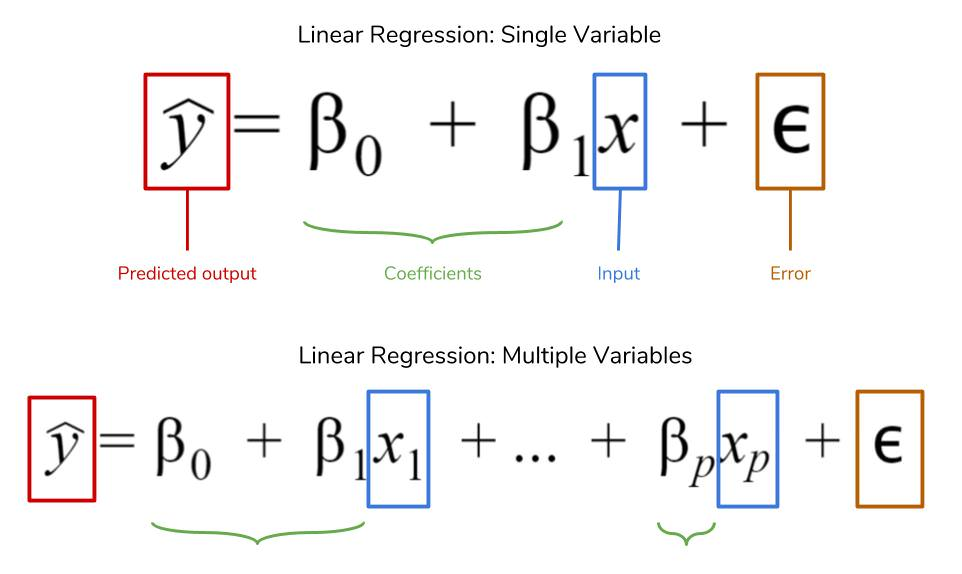

#### Basic Assumptions 

- Linear relationship with the target y
- Feature space X should have gaussian distribution
- Features are not correlated with other
- Features are in same scale i.e. have same variance

## Lasso (L1) and Ridge (L2) Regularization 

Regularization is a technique to discourage the complexity of the model. It does this by penalizing the loss function. This helps to solve the overfitting problem.

- L1 regularization (also called Lasso)
- L2 regularization (also called Ridge)
- L1/L2 regularization (also called Elastic net)

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

# What is Lasso Regularisation 

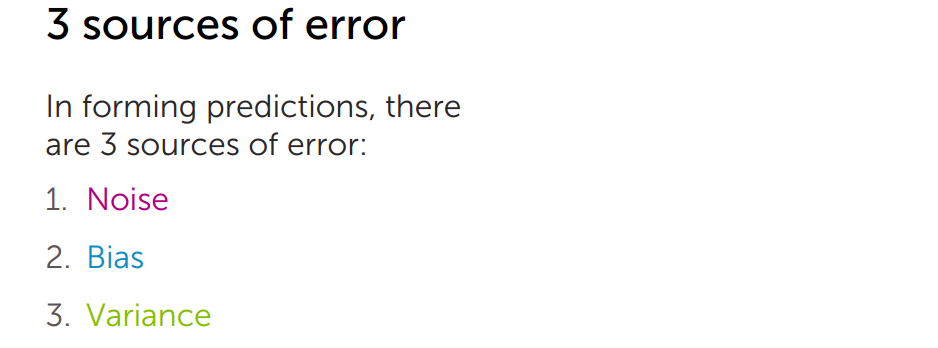

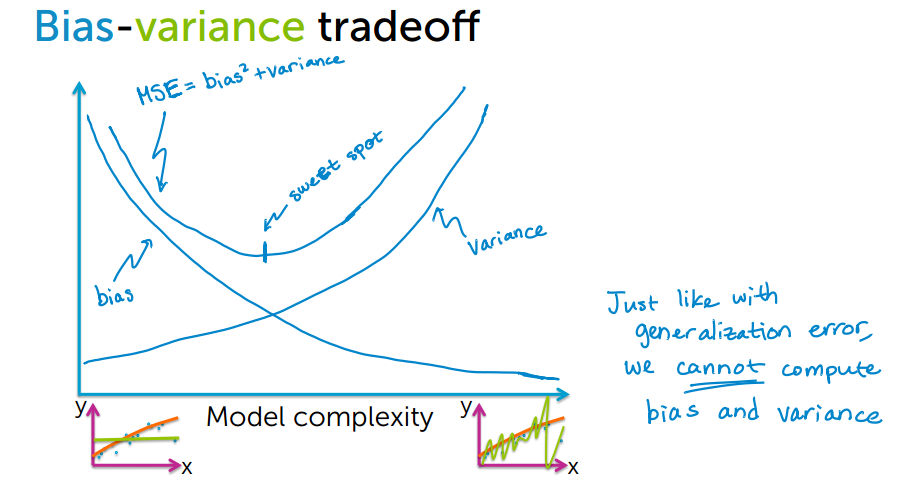

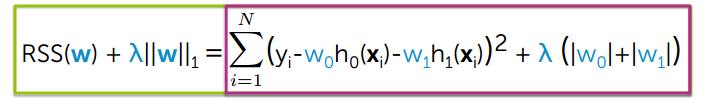

The L1 regularization adds a penalty equal to the sum of the absolute value of the coefficients.

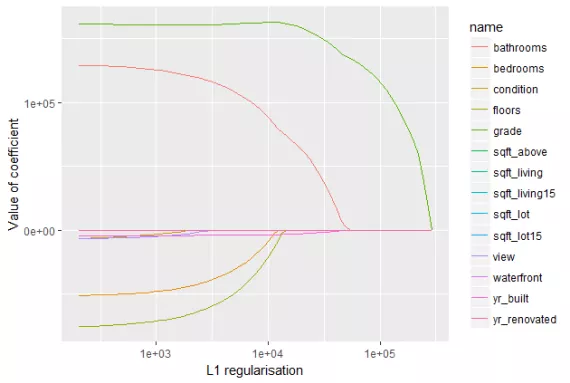

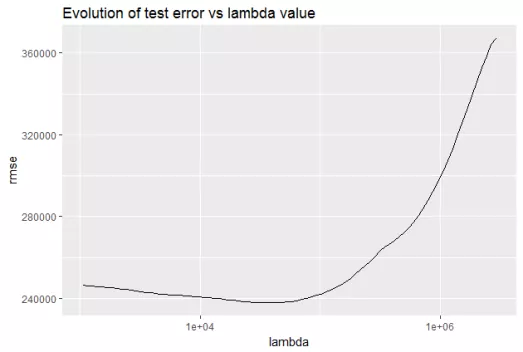

#### How to choose Lambda

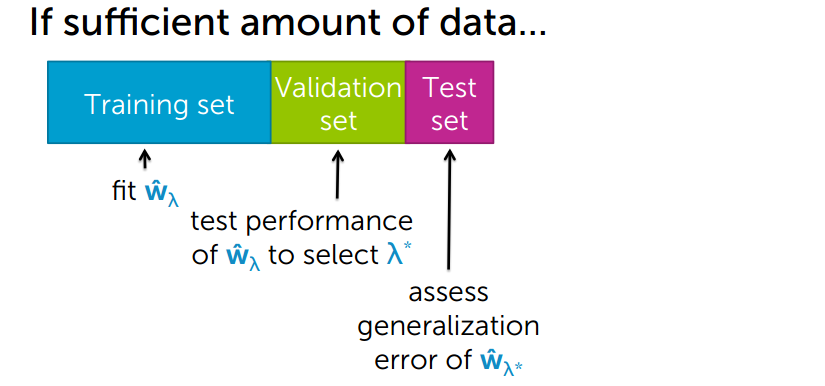

### What is Ridge Regularisation

The L2 regularization adds a penalty equal to the sum of the squared value of the coefficients.

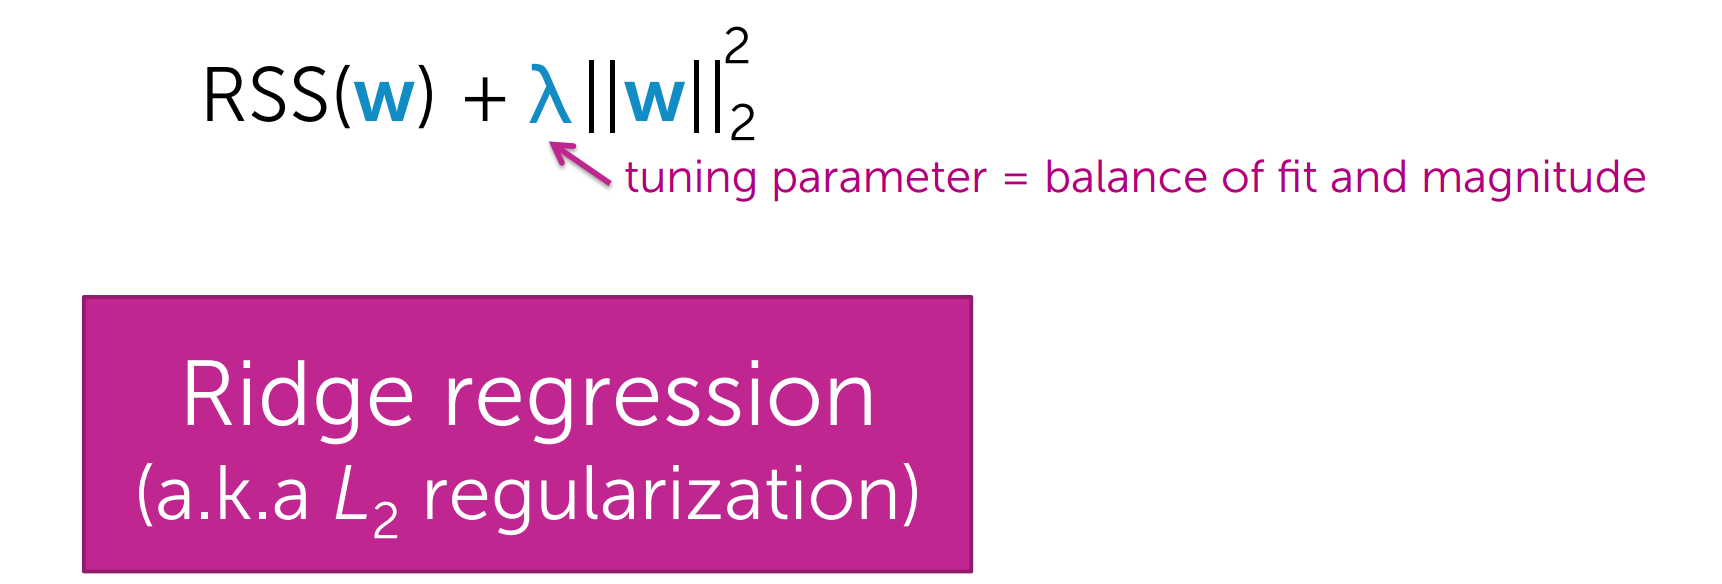

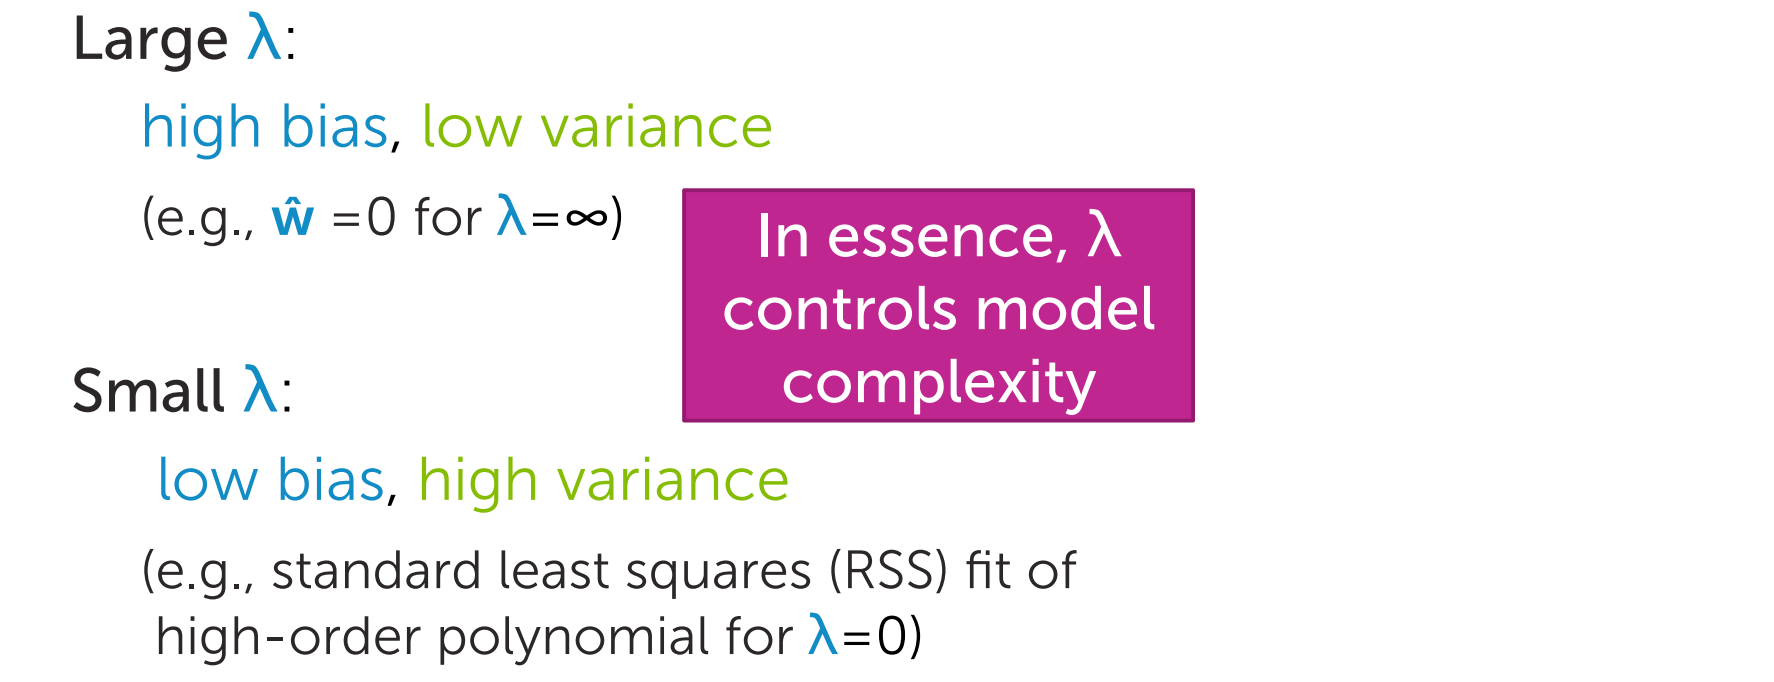

The L2 regularization will force the parameters to be relatively small, the bigger the penalization, the smaller (and the more robust) the coefficients are.

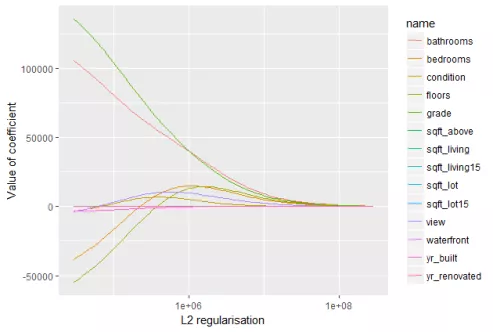

## Difference between L1 and L2 regularization

#### L1 Regularization

- L1 penalizes sum of absolute value of weights.
- L1 has a sparse solution
- L1 has multiple solutions
- L1 has built in feature selection
- L1 is robust to outliers
- L1 generates model that are simple and interpretable but cannot learn complex patterns

#### L2 Regularization 

- L2 regularization penalizes sum of square weights.
- L2 has a non sparse solution
- L2 has one solution
- L2 has no feature selection
- L2 is not robust to outliers
- L2 gives better prediction when output variable is a function of all input features
- L2 regularization is able to learn complex data patterns

# Load the dataset 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
titanic.drop(labels = ['age', 'deck'], axis = 1, inplace = True)

In [8]:
titanic = titanic.dropna()

In [9]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [16]:
data = titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'alone']].copy()

In [17]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [18]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [19]:
sex = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(sex)

In [20]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [21]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data['embarked'] = data['embarked'].map(ports)

In [22]:
who = {'man': 0, 'woman': 1, 'child': 2}
data['who'] = data['who'].map(who)

In [23]:
alone = {True: 1, False: 0}
data['alone'] = data['alone'].map(alone)

In [24]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


In [25]:
X = data.copy()
y = titanic['survived']

In [26]:
X.shape, y.shape

((889, 7), (889,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

### Estimation of coefficients of Linear Regression  

In [28]:
sel = SelectFromModel(LinearRegression())

In [29]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [30]:
sel.get_support()

array([ True,  True, False, False, False,  True, False])

In [31]:
sel.estimator_.coef_

array([-0.13750402,  0.26606466, -0.07470416, -0.0668525 ,  0.04793674,
        0.23857799, -0.12929595])

In [36]:
mean = np.mean(np.abs(sel.estimator_.coef_))

In [37]:
mean

0.13727657291370804

In [38]:
np.abs(sel.estimator_.coef_)

array([0.13750402, 0.26606466, 0.07470416, 0.0668525 , 0.04793674,
       0.23857799, 0.12929595])

In [41]:
features = X_train.columns[sel.get_support()]
features

Index(['pclass', 'sex', 'who'], dtype='object')

In [42]:
X_train_reg = sel.transform(X_train)
X_test_reg = sel.transform(X_test)

In [44]:
X_test_reg.shape

(267, 3)

In [45]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [49]:
%%time
run_randomForest(X_train_reg, X_test_reg, y_train, y_test)

Accuracy:  0.8239700374531835
Wall time: 250 ms


In [50]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.8239700374531835
Wall time: 252 ms


In [48]:
X_train.shape

(622, 7)

### Logistic Regression Coefficient with L1 Regularization 

In [58]:
sel = SelectFromModel(LogisticRegression(penalty = 'l1', C = 0.05, solver = 'liblinear'))
sel.fit(X_train, y_train)
sel.get_support()

array([ True,  True,  True, False, False,  True, False])

In [59]:
sel.estimator_.coef_

array([[-0.54045394,  0.78039608, -0.14081954,  0.        ,  0.        ,
         0.94106713,  0.        ]])

In [60]:
X_train_l1 = sel.transform(X_train)
X_test_l1 = sel.transform(X_test)

In [61]:
%%time
run_randomForest(X_train_l1, X_test_l1, y_train, y_test)

Accuracy:  0.8277153558052435
Wall time: 251 ms


## L2 Regularization 

In [62]:
sel = SelectFromModel(LogisticRegression(penalty = 'l2', C = 0.05, solver = 'liblinear'))
sel.fit(X_train, y_train)
sel.get_support()

array([ True,  True, False, False, False,  True, False])

In [63]:
sel.estimator_.coef_

array([[-0.55749685,  0.85692344, -0.30436065, -0.11841967,  0.2435823 ,
         1.00124155, -0.29875898]])

In [64]:
X_train_l1 = sel.transform(X_train)
X_test_l1 = sel.transform(X_test)

In [65]:
%%time
run_randomForest(X_train_l1, X_test_l1, y_train, y_test)

Accuracy:  0.8239700374531835
Wall time: 250 ms
